In [2]:
import m2mcluster as m2m

In [7]:
from amuse.lab import *
from amuse.units import nbody_system,units

import matplotlib.pyplot as plt
import numpy as np


In [8]:
from amuse.community.hermite.interface import Hermite


In [ ]:
mmin=0.1 | units.MSun
mmax=1.4 | units.MSun

In [9]:
ocluster,oconverter=m2m.setup_star_cluster(N=1000, Mcluster = 1000 | units.MSun, Rcluster = 9. |units.parsec, W0=7.,imf='kroupa',mmin=mmin, mmax=mmax)


DEBUG: 0.1 1.4


In [4]:
#Setup a star cluster for artificial observation
ocluster,oconverter=m2m.setup_star_cluster(N=1000, Mcluster = 1000 | units.MSun, Rcluster = 9. |units.parsec, W0=7.)

#Measure artifical cluster's density profile asssuming an equal number of stars per bin
orlower,orad,orupper,orho=m2m.density(ocluster,bins=True,bintype='fix')
orlower[0]=0.
print(orho)

[  2.43540759e+00   2.70590743e-01   1.44370039e-01   5.10172886e-02
   2.11859154e-02   9.85570236e-03   6.16492901e-03   3.20610694e-03
   2.57310980e-03   3.28857704e-03   8.36008943e-04   4.03434812e-04
   9.27866634e-04   7.63246417e-05   9.92506944e-05   1.58073341e-04
   1.48133398e-05   8.00617271e-06   0.00000000e+00   9.15523255e-06]


In [5]:
while np.sum(orho==0.)!=0:
    ocluster,oconverter=m2m.setup_star_cluster(N=1000, Mcluster = 1000 | units.MSun, Rcluster = 9. |units.parsec, W0=7.)
    orlower,orad,orupper,orho=m2m.density(ocluster,bins=True,bintype='fix')
    orlower[0]=0.


In [6]:
sigv=m2m.velocity_dispersion(ocluster,rlower=orlower,rmid=orad,rupper=orupper)


In [7]:
#Initialize an M2M Star cluster
#Specify number of iterations to run algorithm for
#Specify number of workers to be used by Nbody code
cluster=m2m.starcluster(number_of_iterations=500,number_of_workers=1,debug=False)

In [8]:
#Add the "observed" cluster density profile as an observable
cluster.add_observable(orlower,orad,orupper,orho,'density',ndim=3)
cluster.add_observable(orlower,orad,orupper,sigv,'velocity',ndim=3)

In [9]:
#Initialize a model star cluster will an initial guess as the observed cluster's properties
cluster.initialize_star_cluster(N=1000, Mcluster = 1000 | units.MSun, Rcluster = 3. |units.parsec, softening = 0.01 | units.parsec, W0=1.)

(<amuse.datamodel.particles.Particles at 0x139d74400>,
 <amuse.units.nbody_system.nbody_to_si at 0x139cc86a0>)

In [10]:
#Plot initial positions
cluster.xy_plot(filename='xyplot0.png')

In [11]:
#Compare initial density profiles
cluster.rho_prof(filename='rhoplot0.png')


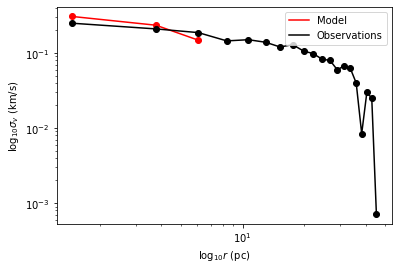

In [12]:
cluster.sigv_prof()


In [13]:
#Exectute the made to measure algorithm
outfile=open('logfile','w')
for i in range(0,cluster.number_of_iterations):
    #Initialize a new N-body simulation ever time step. 
    #In this example I use 1% of the cluster's dynamical time for the integration timeste
    cluster.initialize_gravity_code('Hermite', dt=0.01*cluster.tdyn, theta=0.6)
    #Evolve the model cluster forward for 10% of its dynamical time
    cluster.evolve(tend=0.1*cluster.tdyn)
    #Run the M2M algorithm, which will adjust all of the stellar masses based on kernel function
    cluster.evaluate(kernel=None,epsilon=1.,mu=1.,alpha=1.,plot=False)
    #Compare the new model density profile to the observed one
    cluster.rho_prof(filename='%s.png' % str(i).zfill(5))
    #Centre the star cluster and find determine Nbody conversion scales for next integration
    cluster.reinitialize_star_cluster(mmin= mmin, mtot=1000.0 | units.MSun)

    print(i,len(cluster.stars))
    
    outfile.write('%i %f\n' % (i,cluster.criteria))
    
outfile.close()

TIME UNITS:  0.244963929474 Myr
1000.0 9.26221651421e+16 m 7.73680275127e+13 s
0 1000
TIME UNITS:  0.24516972131 Myr
1000.0 9.23104145776e+16 m 7.697774481e+13 s
1 1000
TIME UNITS:  0.243932963641 Myr
1000.0 9.23495166219e+16 m 7.70266608386e+13 s
2 1000
TIME UNITS:  0.244087972492 Myr
1000.0 9.22684269484e+16 m 7.69252304952e+13 s
3 1000
TIME UNITS:  0.243766552264 Myr
1000.0 9.24636776436e+16 m 7.71695336923e+13 s
4 1000
TIME UNITS:  0.244540718915 Myr
1000.0 9.2301930357e+16 m 7.69671325541e+13 s
5 1000
TIME UNITS:  0.243899334713 Myr
1000.0 9.21623513493e+16 m 7.67926139899e+13 s
6 1000
TIME UNITS:  0.243346306942 Myr
1000.0 9.1539046611e+16 m 7.60148965403e+13 s
7 1000
TIME UNITS:  0.240881816422 Myr
1000.0 9.10846343644e+16 m 7.54495771863e+13 s
8 1000
TIME UNITS:  0.239090389227 Myr
1000.0 9.09629305376e+16 m 7.52984084246e+13 s
9 1000
TIME UNITS:  0.238611354097 Myr
1000.0 9.13281534245e+16 m 7.57523563323e+13 s
10 1000
TIME UNITS:  0.240049858936 Myr
1000.0 9.17696014389e+16 m

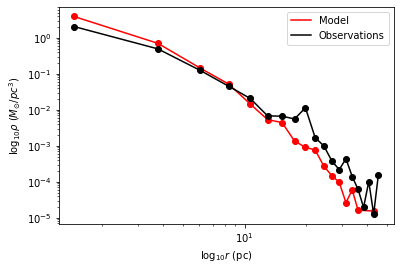

In [14]:
cluster.rho_prof()

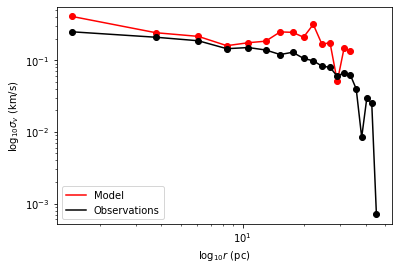

In [15]:
cluster.sigv_prof()

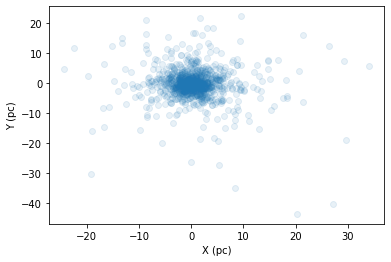

In [16]:
cluster.xy_plot()